# We will assess the 6C wavefield for different volcanoseismic event types

**Based on Eibl, E. P. S., Rosskopf, M., Sciotto, M., Currenti, G., Di Grazia, G., Jousset, P., Krüger, F., Weber, M. (2022) Performance of a Rotational Sensor to Decipher Volcano Seismic Signals on Etna, Italy, Journal of Geophysical Research: Solid Earth, 127, e2021JB023617. DOI: 10.1029/2021JB023617**


We import packages

In [25]:
from obspy.core import read, UTCDateTime
import matplotlib.dates as mdates
from obspy import read_inventory
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
import numpy as np

We set paths

In [26]:
outputpath = "figure_output/"
datapath = "2019_Etna/"

We define filter and axis limits

In [27]:
prefilt = [0.008, 0.01, 95, 99]
fmin = 0.5
fmax = 20
ticks = 30
wlen = 128
overlap = wlen / 2
vmin1 = 2 * 10**-15
vmax1 = 1.0 * 10**-10
vmin = 2 * 10**-17
vmax = 3.0 * 10**-16
log = False

We define a function to read in seismic and rotational data

In [28]:
def read_data(tstart, tend, fmin, fmax):
    '''
    function to read in seismic and rotational data
    param tstart: start time of time window
    type tstart: UTCDateTime object
    param tend: end time of time window
    type tend: UTCDateTime object
    param fmin: lower corner of filter
    type fmin: float
    param fmax: upper corner of filter
    type fmax: float
    '''
    filename = f"{outputpath}seismogram_{str(tstart.year)}_{str(tstart.month)}_{str(tstart.day)}_h{str(tstart.hour)}-{str(tstart.minute)}-{str(tstart.second)}_f{str(fmin)}-{str(fmax)}"

    # we define a wider time window for the plotting
    tstart_early = tstart - 1 * 30
    tend_late = tend + 1 * 30

    # we read in the seismometer data
    fullpath = datapath + "ZR.RS1..HH*"
    st_trans = read(fullpath, starttime=tstart_early, endtime=tend_late)

    # we do further preprocessing of the seismometer data
    print(st_trans)
    st_trans.detrend("demean")
    st_trans.detrend("linear")
    st_trans.taper(max_percentage=0.01, type="cosine")
    st_trans.taper(max_percentage=0.01, type="cosine")

    # we remove the instrument response using a stationxml file
    for tr in st_trans:
        inv = read_inventory(datapath + "Stations_Etna_2019_seis.xml")
        pre_filt = [prefilt[0], prefilt[1], prefilt[2], prefilt[3]]
        tr.remove_response(inventory=inv, pre_filt=pre_filt, output="VEL")

    # we do further preprocessing of the seismometer data
    st_trans.detrend("demean")
    st_trans.detrend("linear")
    st_trans.taper(max_percentage=0.01, type="cosine")
    st_trans.filter("bandpass", freqmin=fmin, freqmax=fmax, corners=2, zerophase=True)
    st_trans.trim(tstart, tend)
    st_trans.sort()

    # we read in the rotational sensor data
    fullpath = datapath + "ZR.RS1..HJ*"
    st_rot = read(fullpath, starttime=tstart, endtime=tend)

    # we do further preprocessing
    print(st_rot)
    st_rot.detrend("demean")
    st_rot.detrend("linear")
    st_rot.taper(max_percentage=0.01, type="cosine")
    st_rot.taper(max_percentage=0.01, type="cosine")
    st_rot.detrend("demean")
    st_rot.detrend("linear")
    st_rot.taper(max_percentage=0.01, type="cosine")
    st_rot.filter("bandpass", freqmin=fmin, freqmax=fmax, corners=2, zerophase=True)
    st_rot.trim(tstart, tend)
    st_rot.sort()

    # we convert the rotational sensor rotation rate data from nanorad/s to rad/s,
    # the response is flat and no further instrument response removal is needed
    st_rot[0].data = st_rot[0].data * 1e-9
    st_rot[1].data = st_rot[1].data * 1e-9
    st_rot[2].data = st_rot[2].data * 1e-9

    # we integrate to convert the rotational sensor data to rotation
    st_rot.integrate()

    # we derive the y axes limits
    trans_max = np.abs(st_trans[0].max())
    rot_max = np.abs(st_rot[0].max())

    # we merge seismometer and rotational sensor data into one stream object
    st = st_trans + st_rot
    return st, trans_max, rot_max, filename

**Exercise 1.1: Please plot a seismogram**

Step 1: Plot the seismogram of one component seismic data. We want to use the 'matplotlib' date format from 'obspy.core.trace.Trace.times' for the time axes.

Step 2: Set the starttime 'tstart' to 15:52:00 on 4 September 2019

Step 3: Set the endtime 'tend' to 15:54:00 on 4 September 2019

Step 4: Call the function

3 Trace(s) in Stream:
ZR.RS1..HHE | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:30.000000Z | 200.0 Hz, 30001 samples
ZR.RS1..HHN | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:30.000000Z | 200.0 Hz, 30001 samples
ZR.RS1..HHZ | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:30.000000Z | 200.0 Hz, 30001 samples


3 Trace(s) in Stream:
ZR.RS1..HJE | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:00.000000Z | 200.0 Hz, 24001 samples
ZR.RS1..HJN | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:00.000000Z | 200.0 Hz, 24001 samples
ZR.RS1..HJZ | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:00.000000Z | 200.0 Hz, 24001 samples


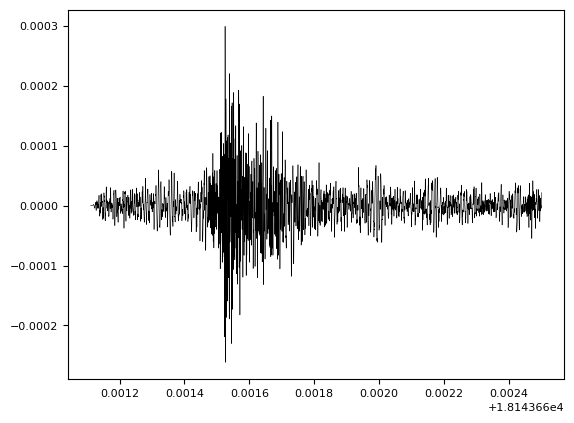

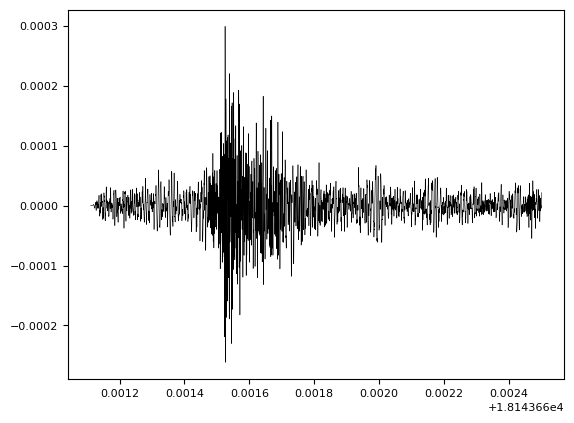

In [29]:
def plot_seismogram(axis, trace):
    '''
    function to plot a seismogram
    param axis: figure axis to use for plotting 
    type axis: figure axis
    param trace: 1 component seismic data
    type trace: Obspy Trace object
    '''
    XX

tstart = XX
tend = XX
stream, _, _, _ = read_data(tstart, tend, fmin, fmax)

fig, axis = plt.subplots()
XX
fig

**Exercise 1.2: Please plot a spectrogram**

Step 1: Plot the data of one component. We want to use signal.spectrogram. You need to hand over in this order (i) a trace of seismic data, (ii) its sampling rate, (iii) assign the window length to the keyword argument 'nperseg' and (iv) the overlap to the keyword argument 'noverlap'.

Step 2: Call the function 

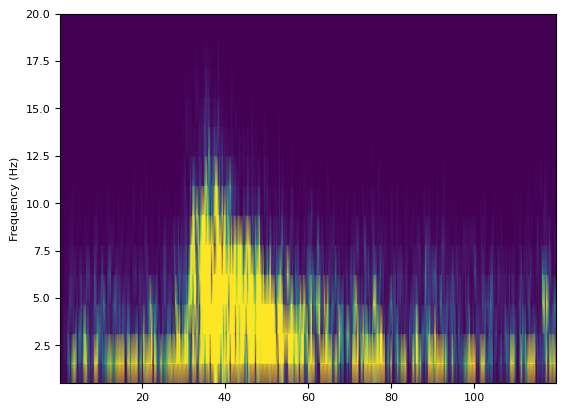

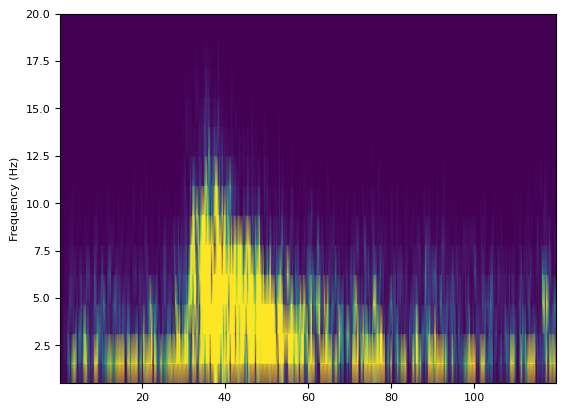

In [30]:
def plot_spectrogram(axis, trace, vmin, vmax, tstart, wlen, overlap):
    '''
    function to plot a spectrogram
    param axis: figure axis to use for plotting 
    type axis: figure axis
    param trace: 1 component seismic data
    type trace: Obspy Trace object
    param vmin: lower limit for colorbar
    type vmin: float
    param vmax: upper limit for colorbar
    type vmax: float
    param tstart: start time of time window
    type tstart: UTCDateTime object
    param wlen: moving window length for spectrogram 
    type wlen: int
    param overlap: overlap of moving window
    type overlap: float in the range from 0 to 1
    '''
    cmap = plt.cm.viridis
    f, t, Sxx = XX
    tshift = (trace.stats.starttime - tstart) * trace.stats.sampling_rate
    img = plt.pcolormesh(
        t + tshift / trace.stats.sampling_rate,
        f,
        Sxx,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        shading="gouraud",
    )  # flat is sharper
    axis.set_ylim(fmin, fmax)
    axis.set_ylabel("Frequency (Hz)")
    if log == True:
        axis.set_yscale("symlog")
    return img

fig, axis = plt.subplots()
XX
fig

We define a function to plot the 6C wavefield.

In [31]:
def plotting_6C_data(st, trans_max, rot_max, filename):
    '''
    function to plot seismograms and spectrograms of 6C data
    param st: 6C seismometer and rotational sensor data
    type st: Obspy Stream object
    param trans_max: maximum amplitude of translational data
    type trans_max: float
    param rot_max: maximum amplitude of rotational data
    type rot_max: float
    param filename: filename of file to be saved without '.png' ending
    type filename: string
    '''
    
    # we initialise the figure
    fig = plt.figure()
    mpl.rcParams["pcolor.shading"]

    for i in range(6):
        ax0 = plt.subplot(6, 2, 1 + 2 * i)
        # We plot a colume of seismograms.
        # The components are from top to bottom: HHE, HHN, HHZ, HJE, HJN, HJZ
        plot_seismogram(ax0, st[i])

        # we label the y axes
        if st[i].stats.channel == "HHE":
            chan = st[i].stats.channel + " (m/s)"
        if st[i].stats.channel == "HHN":
            chan = st[i].stats.channel + " (m/s)"
        if st[i].stats.channel == "HHZ":
            chan = st[i].stats.channel + " (m/s)"
        if st[i].stats.channel == "HJ1" or st[i].stats.channel == "HJE":
            chan = " HJE (rad)"
        if st[i].stats.channel == "HJ2" or st[i].stats.channel == "HJN":
            chan = " HJN (rad)"
        if st[i].stats.channel == "HJ3" or st[i].stats.channel == "HJZ":
            chan = " HJZ (rad)"

        # we set the y axes limits
        if i < 3:
            ax0.set_ylim(-trans_max, trans_max)
        else:
            ax0.set_ylim(-rot_max, rot_max)
        ax0.set_ylabel(f"{st[i].stats.station}: {chan}")

        # we format the seismometer time axis
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
        plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=ticks))

        # we plot the spectrograms
        ax1 = plt.subplot(6, 2, 2 + 2 * i)

        _vmin = vmin
        _vmax = vmax
        if i < 3:
            _vmin = vmin1
            _vmax = vmax1
        img = plot_spectrogram(ax1, st[i], _vmin, _vmax, tstart, wlen, overlap)

        # we label seismogram and spectrogram time axes
        if i == 5:
            ax0.set_xlabel(
                f"Time on {(st[i].stats.starttime+2).day}/{st[i].stats.starttime.month}/{st[i].stats.starttime.year} (hh:mm:ss)"
            )
            ax1.set_xlabel(
                f"Time from {(st[i].stats.starttime+2).day}/{st[i].stats.starttime.month}/{st[i].stats.starttime.year} {st[i].stats.starttime.hour}:{st[i].stats.starttime.minute}:{st[i].stats.starttime.second}(s)"
            )

        # we remove some x axis labels
        if i != len(st) - 1:
            plt.setp(ax0.get_xticklabels(), visible=False)
            plt.setp(ax1.get_xticklabels(), visible=False)

        # we add a colorbar
        if i < 3:
            cbaxes = fig.add_axes([0.927, 0.505, 0.01, 0.37])
            cb = plt.colorbar(img, cax=cbaxes, label="Spectral density ((m/s)$^2$/Hz)")
        else:
            cbaxes = fig.add_axes([0.927, 0.11, 0.01, 0.37])
            cb = plt.colorbar(img, cax=cbaxes, label="Spectral density ((rad)$^2$/Hz)")

    # we save the figure
    plt.savefig(filename + ".png", format="png", dpi=500)


**Exercise 1.3: Please define the starttimes of the events using UTCDateTime**

We now create a loop to read and plot all six events. 

Condition 1: Please set 'tstart' to 15:52:00 on 4 September 2019.

Condition 2: Please set 'tstart' to 18:40:30 on 17 September 2019.

Condition 3: Please set 'tstart' to 14:21:00 on 27 August 2019.

Condition 4: Please set 'tstart' to 12:18:00 on 27 August 2019.

Condition 5: Please set 'tstart' to 12:18:00 on 8 September 2019.

Condition 6: Please set 'tstart' to 12:18:00 on 9 September 2019.

3 Trace(s) in Stream:
ZR.RS1..HHE | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:30.000000Z | 200.0 Hz, 30001 samples
ZR.RS1..HHN | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:30.000000Z | 200.0 Hz, 30001 samples
ZR.RS1..HHZ | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:30.000000Z | 200.0 Hz, 30001 samples
3 Trace(s) in Stream:
ZR.RS1..HJE | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:00.000000Z | 200.0 Hz, 24001 samples
ZR.RS1..HJN | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:00.000000Z | 200.0 Hz, 24001 samples
ZR.RS1..HJZ | 2019-09-04T15:52:00.000000Z - 2019-09-04T15:54:00.000000Z | 200.0 Hz, 24001 samples
3 Trace(s) in Stream:
ZR.RS1..HHE | 2019-09-17T18:40:00.000000Z - 2019-09-17T18:43:00.000000Z | 200.0 Hz, 36001 samples
ZR.RS1..HHN | 2019-09-17T18:40:00.000000Z - 2019-09-17T18:43:00.000000Z | 200.0 Hz, 36001 samples
ZR.RS1..HHZ | 2019-09-17T18:40:00.000000Z - 2019-09-17T18:43:00.000000Z | 200.0 Hz, 36001 samples
3 Trace(s) in Stream:
ZR.RS1..HJE | 2019-09-17T18:40

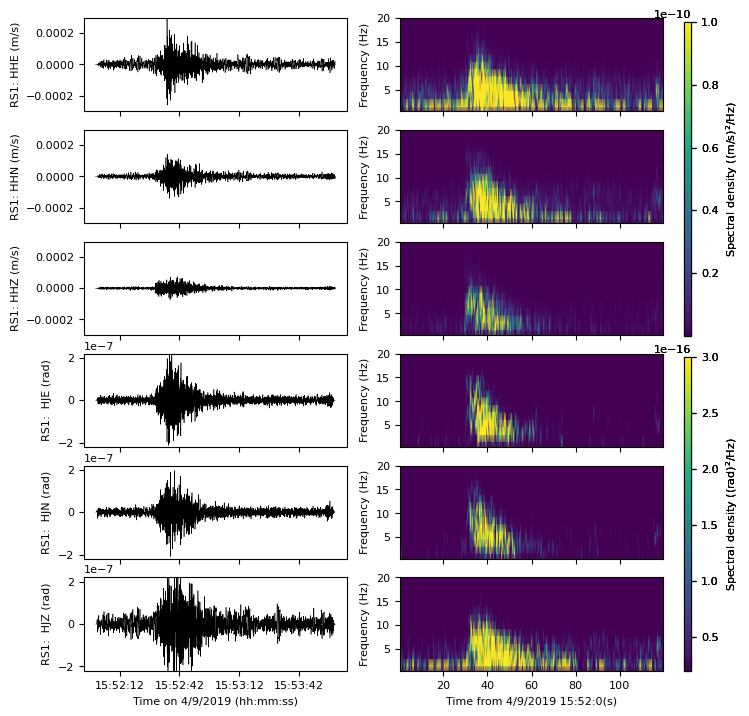

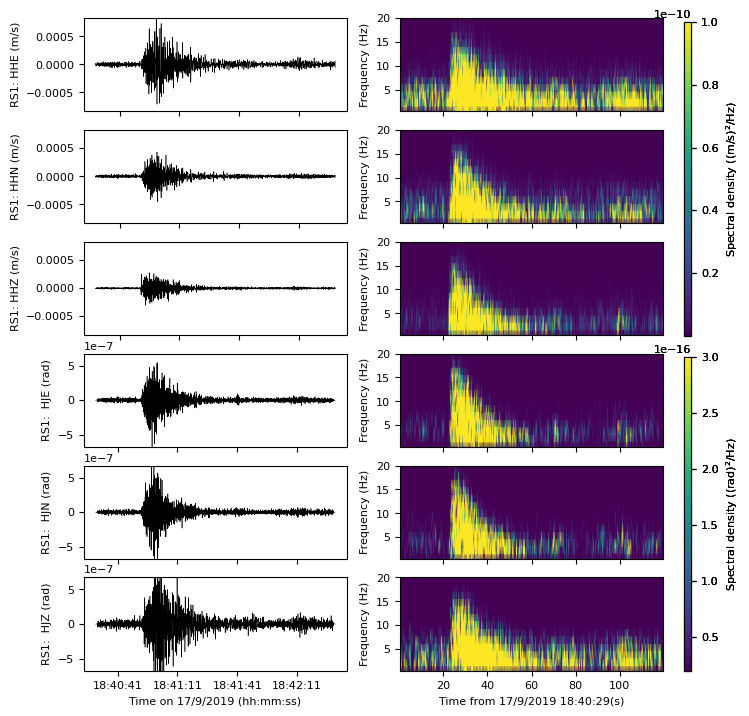

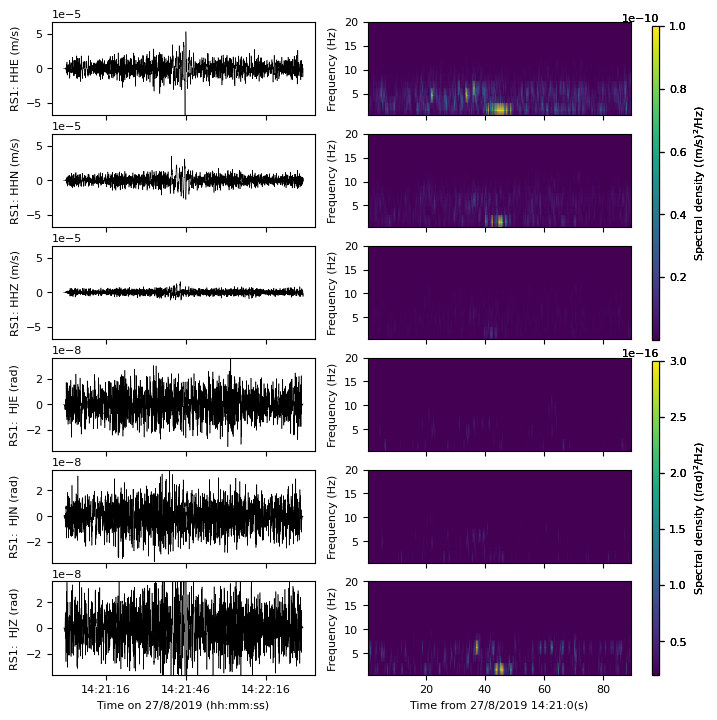

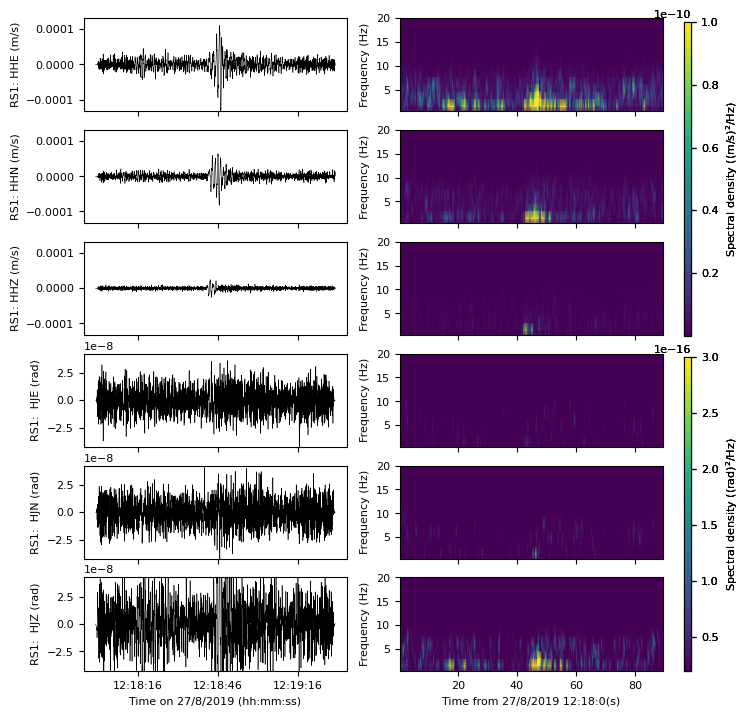

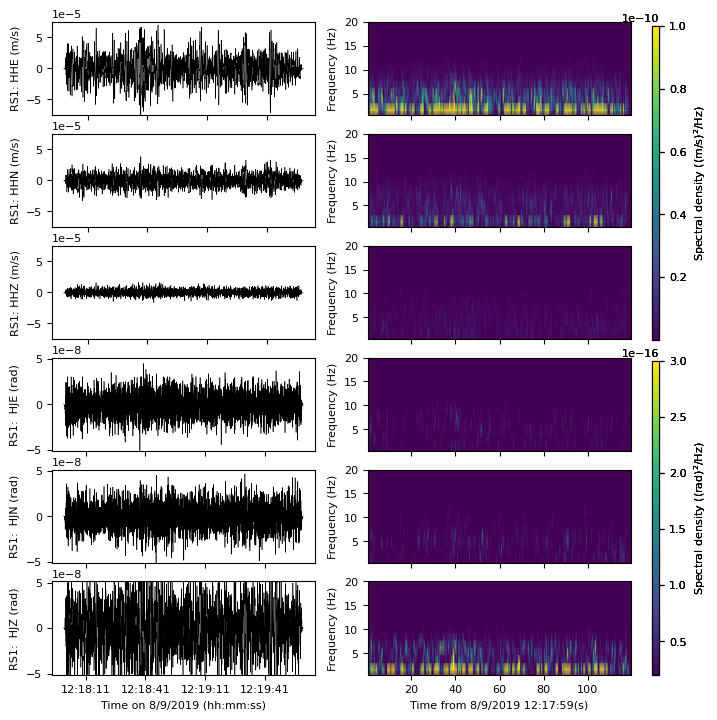

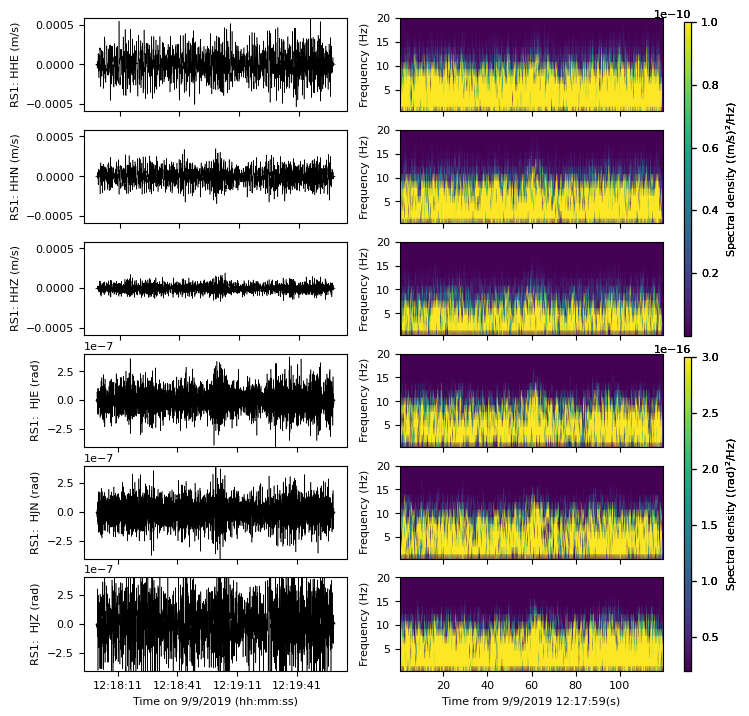

In [32]:
for ii in range(6):
    if ii == 0:  # VT
        XX
        tend = tstart + 120
    elif ii == 1:  # VT
        # 2019-09-17T18:40:52.400000Z  17-09 18:40:52  3.1 ML  37.735  14.873  4.1  0.2 km SE from Monte Minardo (CT)  260
        XX
        tend = tstart + 120
    elif ii == 2:  # LP
        XX
        tend = tstart + 90
    elif ii == 3:  # LP
        XX
        tend = tstart + 90
    elif ii == 4:  # no tremor
        XX
        tend = tstart + 120
    elif ii == 5:  # tremor
        XX
        tend = tstart + 120

    # we read the data
    st, trans_max, rot_max, filename = read_data(tstart, tend, fmin, fmax)

    # we plot the data
    plotting_6C_data(st, trans_max, rot_max, filename)